In [1]:
#Importing the relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy import sparse

In [2]:
#Code to make sure the font is as i want it in the plots:
plt.rc('font',family='Times New Roman')

In [3]:
#First, we´ll make the discrete hamiltonian function:
def Hamiltonian_adjustable_accuracy(P, P_range, V, m, diff_matrix):
    """ 
    
    Constructs, and returns the hamiltonian of a given system in discretised matrix form(with hbar=1), using 
    a finite difference scheme of the given accuracy specified. P is the number of points as an 
    integer, P_range is an array consisting of the starting and ending x-value in the given range one wants the problem solved for. p[0] is the smallest 
    value,, while p[1] is the biggest(in the positive direction).


    """
    h_bar = 1
    x_vals = np.linspace(P_range[0], P_range[1], P)
    dx = (P_range[1] - P_range[0])/P

    V_matrix = np.diag(V(x_vals, m))
    ddf = diff_matrix(P, dx)
    
    return (-h_bar**2/(2*m)*ddf + V_matrix)

#Next, we´ll construct some more accurate derivative matrices using the table from https://en.wikipedia.org/wiki/Finite_difference_coefficient´ central
# difference scheme of second order derivatives(Do note, however, that there is a slight inaccuracy, owing to the fact, that i´ve only used 
# the central difference scheme, which is tecnically not correct at the edges. It does not, to my knowledge, matter for the end result):
def Derivative_Matrix_Accuracy_4(P, dx):
    """  
    Makes the second order discretised differentiated function in matrix form. dx is the spacing between points, while P is the total number 
    of points to be found. Returns the matrix as an numpy array. Accuracy of 4, according to the wiki. P is the number of points, while
    dx is the spacing

    """
    coeffs_of_function_vals = (-1/12 *np.ones(P-2) , 4/3 *np.ones(P-1) , -5/2*np.ones(P))
    ddf = (1/dx**2)*(np.diag(coeffs_of_function_vals[0], -2) + np.diag(coeffs_of_function_vals[1], -1) + np.diag(coeffs_of_function_vals[2], 0) + np.diag(coeffs_of_function_vals[1], 1) + np.diag(coeffs_of_function_vals[0], 2))
    return ddf

def Derivative_Matrix_Accuracy_8(P, dx):
    """  
    Makes the second order discretised differentiated function in matrix form. dx is the spacing between points, while P is the total number 
    of points to be found. Returns the matrix as an numpy array. Accuracy of 8, according to the wiki. P is the number of points, while
    dx is the spacing

    """
    coeffs_of_function_vals = (-1/560 *np.ones(P-4) , 8/315 *np.ones(P-3) , -1/5*np.ones(P-2), 8/5 *np.ones(P-1), -205/72 * np.ones(P))
    ddf = (1/dx**2)*(np.diag(coeffs_of_function_vals[0], -4) + np.diag(coeffs_of_function_vals[1], -3) + np.diag(coeffs_of_function_vals[2], -2) + np.diag(coeffs_of_function_vals[3], -1) + np.diag(coeffs_of_function_vals[4], 0) + np.diag(coeffs_of_function_vals[3], 1) + np.diag(coeffs_of_function_vals[2], 2) + np.diag(coeffs_of_function_vals[1], 3) + np.diag(coeffs_of_function_vals[0], 4))
    return ddf

In [4]:
#We now want to solve our given problem. The following have been made as a general function, but we´ll only need m=1, as that is 
#what ended up nescesarry for the project:
def V(x, m):
    """  
    
    Returns an anharmonic oscillator of the form m*x**4, with m the mass, which is allowed to be variable. x should be an array of the x values you want
    the function evaluated for.

    """
    return m*x**4

#Constructing the hamiltonian, and defining ranges and points:
P = 18000
P_range = [-100, 100]
m = 1
H = Hamiltonian_adjustable_accuracy(P, P_range, V, m, Derivative_Matrix_Accuracy_8)


In [5]:
#Next, we´ll use the fact, that scipy has a usefull feature called sparse matrices, such that our calculation doesn´t take ages, and is more accurate.
#As such, sH simply refers to the fact, that this is the scipy version of the hamiltonian. 
sH = sparse.csr_matrix(H)

#Next, we simply solve the eigenvalue problem. Note that, as i recall, sigma=0 makes sure the eigenvalues actually start at the lowest, rather than
#highest point. I.e., remove it, and you get values in the 10^8 range. eigs are energy, and vects are the transposed eigenstates(need .T to plot)
eigs, vects = sparse.linalg.eigsh(sH, k=100, sigma=0)

In [6]:
#We want to compare to the variational result, so let´s find them. We first want a function based on the result from the report:
def variational_anharmonic(x):
    """  
    
    Returns the supersymmetric variational approximation to the energies of the 
    anharmonic oscillator of the form x**4. x is an array of values you want this function evaluated for.

    """
    return (3/16 + x)*4*(3/4)**(1/4)

#Then we need some values to evaluate it at, which are rounded, in case of some weird floating point stuff happen. Though strictly speaking not nescesarry
#I think.
nvals = np.linspace(0, 100, 101)
nvals = np.round(nvals)
#Lastly, we´ll calculate the values:
var_anhamronic_energies = variational_anharmonic(nvals)

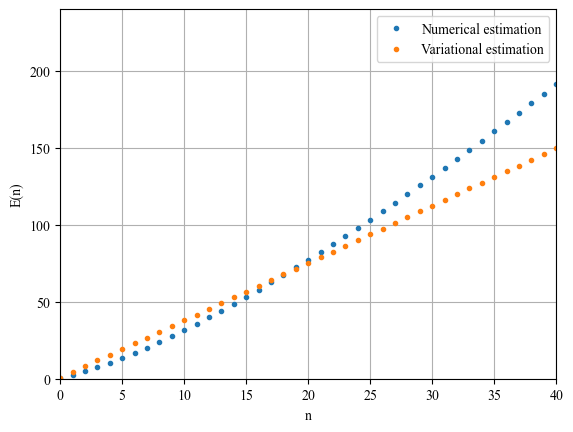

In [7]:
#And then plot the results of our efforts:
#plt.title("Comparison of numerical and variational estimations of energies")
plt.plot(eigs, ".", label="Numerical estimation")
plt.plot(var_anhamronic_energies, ".",  label = "Variational estimation")
plt.xlabel("n")
plt.ylabel("E(n)")
plt.xlim(0, 40)
plt.ylim(0, 240)
plt.grid()
plt.legend()
plt.savefig("NumericalVSvariationalANHARM.png")